In [1]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [5]:
# import tensorflow as tf

# # Get the GPU device name.
# device_name = tf.test.gpu_device_name()

# # The device name should look like the following:
# if device_name == '/device:GPU:0':
#     print('Found GPU at: {}'.format(device_name))
# else:
#     raise SystemError('GPU device not found')

In [2]:
!pip install transformers
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
reviews_data = pd.read_csv('/content/all_kindle_review .csv')# Drop missing review 

### Data Preparation 

In [4]:
reviews_data.shape

(12000, 11)

In [5]:
reviews_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [6]:
reviews_data['reviewText']= reviews_data[ 'reviewText'].apply(lambda x:" ".join(x.lower() for I in x.split()))


In [7]:
reviews_data['reviewText']

0        jace rankin may be short, but he's nothing to ...
1        great short read.  i didn't want to put it dow...
2        i'll start by saying this is the first of four...
3        aggie is angela lansbury who carries pocketboo...
4        i did not expect this type of book to be in li...
                               ...                        
11995    valentine cupid is a vampire- jena and ian ano...
11996    i have read all seven books in this series. ap...
11997    this book really just wasn't my cuppa.  the si...
11998    tried to use it to charge my kindle, it didn't...
11999    taking instruction is a look into the often hi...
Name: reviewText, Length: 12000, dtype: object

In [8]:
reviews_data.rename(columns={'asin':'ProductId', 'overall':'Score', 'reviewText':'Text', 'reviewerID':'UserId', 'summary':'Summary', 'unixReviewTime':'Time'}, inplace=True)

reviews_data.head()

,Unnamed: 0,Unnamed: 0.1,ProductId,helpful,rating,Text,reviewTime,UserId,reviewerName,Summary,Time
0,0,11539,B0033UV8HI,"[8, 10]",3,"jace rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,great short read. i didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,i'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,aggie is angela lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,i did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [9]:
reviews_data.drop(['Unnamed: 0','helpful','reviewTime','reviewerName'], axis=1, inplace=True)

reviews_data.head()

,Unnamed: 0.1,ProductId,rating,Text,UserId,Summary,Time
0,11539,B0033UV8HI,3,"jace rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Entertaining But Average,1283385600
1,5957,B002HJV4DE,5,great short read. i didn't want to put it dow...,A2RGNZ0TRF578I,Terrific menage scenes!,1381190400
2,9146,B002ZG96I4,3,i'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Snapdragon Alley,1397174400
3,7038,B002QHWOEU,3,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,very light murder cozy,1404518400
4,1776,B001A06VJ8,4,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Book,1356912000


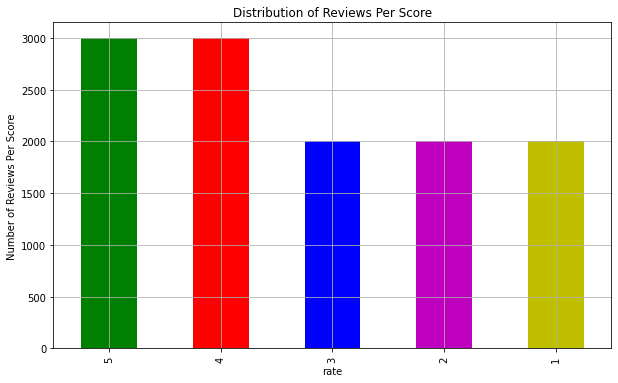

In [10]:
category_dist = reviews_data['rating'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'm', 'y']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("rate")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

In [11]:
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

actualScore = reviews_data['rating']
pos_neg = actualScore.map(partition)
reviews_data['rating'] = pos_neg

reviews_data.head()

,Unnamed: 0.1,ProductId,rating,Text,UserId,Summary,Time
0,11539,B0033UV8HI,Positive,"jace rankin may be short, but he's nothing to ...",A3HHXRELK8BHQG,Entertaining But Average,1283385600
1,5957,B002HJV4DE,Positive,great short read. i didn't want to put it dow...,A2RGNZ0TRF578I,Terrific menage scenes!,1381190400
2,9146,B002ZG96I4,Positive,i'll start by saying this is the first of four...,A3S0H2HV6U1I7F,Snapdragon Alley,1397174400
3,7038,B002QHWOEU,Positive,aggie is angela lansbury who carries pocketboo...,AC4OQW3GZ919J,very light murder cozy,1404518400
4,1776,B001A06VJ8,Positive,i did not expect this type of book to be in li...,A3C9V987IQHOQD,Book,1356912000


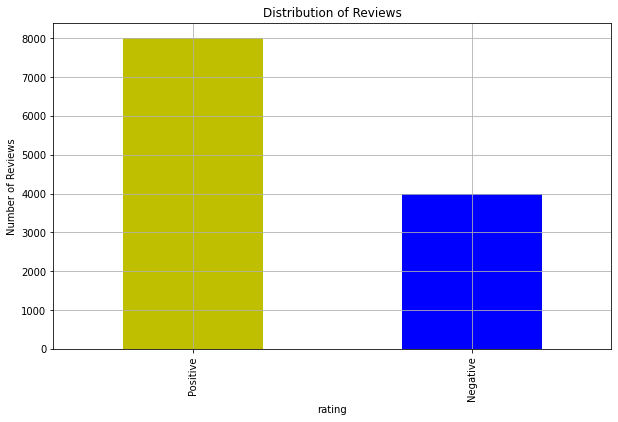

In [12]:
category_dist = reviews_data['rating'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['y', 'b']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()

In [13]:
reviews_data = reviews_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [14]:
reviews_data = reviews_data.drop_duplicates(subset={"ProductId","UserId","Time","Text"}, keep='first', inplace=False)
reviews_data.shape

(12000, 7)

In [15]:
reviews_data['rating'].value_counts()

Positive    8000
Negative    4000
Name: rating, dtype: int64

In [16]:
cls_majority = reviews_data[reviews_data['rating']=='Positive'].head(4000).copy()
cls_minority1   = reviews_data[reviews_data['rating']=='Negative'].copy()
upsampled_data = pd.concat([cls_minority1 , cls_majority])

In [17]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
upsampled_data['label'] = label.fit_transform(upsampled_data['rating'])  
upsampled_data.head()

,Unnamed: 0.1,ProductId,rating,Text,UserId,Summary,Time,label
1555,21,B000FA64QO,Negative,"with ylesia, a novella originally published in...",A3SZMGJMV0G16C,Minor New Jedi Order side story,1331769600,0
7213,42,B000FC1BN8,Negative,"i admit it, i snapped this up the moment i saw...",A1YEPFLLH42OU1,An average short story,1358380800,0
11673,39,B000FC1BN8,Negative,"for whatever reason, star wars short stories a...",AQZH7YTWQPOBE,"Too short, not enough story",1285286400,0
3379,65,B000FDJ0FS,Negative,somewhat of a disappointment. the articles we...,A2XGPSOJXTW5JF,Wall Street Journal,1355356800,0
2139,67,B000FDJ0FS,Negative,"the wsj for kindle is overpriced, and the cust...",A3775OP5VTX5ON,The WSJ Has Gone to Pot!,1203984000,0


In [18]:
upsampled_data.shape

(8000, 8)

In [19]:
upsampled_data.isna().sum()

Unnamed: 0.1    0
ProductId       0
rating          0
Text            0
UserId          0
Summary         0
Time            0
label           0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
train , test =train_test_split(upsampled_data,test_size = 0.3)

In [25]:
test.shape 

(2400, 8)

In [21]:
train['Text'].head()

9236    the one rule of a short story is that it be sh...
280     this was perhaps the most surreal little story...
3771    a very nice newspaper and very good writing. t...
1371    herbert has a gift of setting scene and making...
2882    this was a book that i thoroughly enjoyed from...
Name: Text, dtype: object

### Preprocessing 

In [22]:
import nltk
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('punkt') 
from nltk.corpus import stopwords 
STOPWORDS = set(stopwords.words('english')) 
from nltk.tokenize import word_tokenize 
import re


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:

!pip3 install inflect 
import inflect 
p = inflect.engine() 
from nltk.stem import WordNetLemmatizer 
import re
from nltk.tokenize import word_tokenize
import gensim 
import string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
from nltk.corpus import wordnet as wn

In [26]:
def text_Preprocessing (text):
    def remove_emoji(text): 
      emoji_pattern= re.compile("[" 
                                u"\U0001F600-\U0001F64F"
                                u"\U0001F300-\U0001F5FF"  
                                u"\U0001F680-\U0001F6FF"  
                                u"\U0001F1E0-\U0001F1FF" 
                                u"\U00002702-\U00002780"  
                                u"\U00002402-\U0001F251" "]+", flags=re. UNICODE) 
      return emoji_pattern.sub(r'', text) 
    reviews =[text.lower() for text in text] 
    reviews =[re.sub (r'\S+@\S+','', text) for text in reviews] 
    reviews =[re.sub (r'\d+','', text) for text in reviews] 
    reviews =[re.sub(r'[^\w\s]','',text) for text in reviews] #removing all the #removing extra sp 
    reviews =[text.strip() for text in reviews] 
    reviews =[remove_emoji(text) for text in reviews] 
   
    stop_words= set(stopwords.words('english')) 
    cleaned_reviews=[] 
    for review in reviews:
         tokens = [word for word in word_tokenize (review) if not word in stop_words] 
         cleaned_reviews.append(" ".join(tokens))
        
    lemmatize = WordNetLemmatizer() 
    lem_reviews=[] 
    for review in cleaned_reviews:
       lem_reviews.append(" ".join(list(map(lemmatize.lemmatize, word_tokenize (review)))))
    return lem_reviews  

In [27]:
t=train['Text']
train['Text'] = text_Preprocessing(t)

In [28]:
t=test['Text']
test['Text'] = text_Preprocessing(t)

In [29]:
train['word counts after preprocess']=train['Text'].apply(lambda x: len(str(x.split())))
test['word_counts after preprocess']= test['Text'].apply(lambda x: len(str(x.split())))

In [30]:
train['Text'].head()

9236    one rule short story short lol remember wild c...
280     perhaps surreal little story absolutely set ev...
3771    nice newspaper good writing fun good buy know ...
1371    herbert gift setting scene making people real ...
2882    book thoroughly enjoyed beginning end story li...
Name: Text, dtype: object

In [31]:
y_train =train['rating'] 
X_train = train 
X_train.drop('rating', axis=1, inplace=True) 
y_test = test['rating'] 
X_test = test 
X_test.drop('rating', axis=1, inplace=True)

In [37]:
X_train.head()

,Unnamed: 0.1,ProductId,Text,UserId,Summary,Time,label,word counts after preprocess
10870,3083,B001T4YZ16,stopped reading read keep truckin al green edd...,A89L8O00O4XFH,too much,1391212800,0,16968
7593,10730,B0032J0IJ4,beginning thought sexy continued lacked real e...,A3CCG7X3TYUCCN,Pass,1373241600,0,19392
9860,9629,B0030F2S70,still wasted precious time life review stated ...,A2F8Z0D1X2FBFP,Good thing it was free,1304035200,0,27600
10925,21022,B003U89RS0,rare finish reading book even skip last chapte...,A1I6BG5XRGOUJJ,Not A Good Read,1384819200,0,36125
1292,28955,B0044UHVBS,found nonfiction section expected memoir novel...,A2NV8ECUE5QPAW,A Lousy Novel,1396224000,0,20069


In [38]:
# pip install tensorflow

In [32]:
import tensorflow as tf 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer (num_words = 10000) 
tokenizer.fit_on_texts(X_train["Text"]) 
X_train['text_tok'] = tokenizer.texts_to_sequences(X_train['Text'].values) 
X_test['text_tok'] = tokenizer.texts_to_sequences(X_test['Text'].values)

In [40]:
# print("TFIDF Vectorizer……")
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# tf_x_train = vectorizer.fit_transform(X_train)
# tf_x_test = vectorizer.transform(X_test)

In [33]:
from tensorflow.keras.preprocessing import sequence
max_review_length= 1500
X_train_pad = sequence.pad_sequences(X_train['text_tok' ].values, maxlen=max_review_length , padding='post')
X_test_pad  = sequence.pad_sequences(X_test['text_tok' ].values, maxlen=max_review_length , padding='post')

In [42]:
# !pip install gensim


In [43]:
# import gensim.downloader as api

In [44]:
# model = api.load("glove-wiki-gigaword-50")

##Glove Model

In [34]:
!wget https://nlp.stanford.edu/data/wordvecs/glove.6B.zip

--2023-02-10 09:40:42--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2023-02-10 09:40:42--  https://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-02-10 09:43:22 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182753/862182753]



In [35]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [37]:
fastText_file = open('/content/glove.6B.300d.txt', encoding="utf8")
embeddings_index = dict()
for line in fastText_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
fastText_file.close()

print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400001 word vectors.


In [39]:
# create a weight matrix
max_vocabulary = len(tokenizer.word_index)
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [40]:
from tensorflow.python.keras.utils import np_utils
X_train = X_train_pad
X_test = X_test_pad
Y_train = train['label'] 
Y_test = test['label'] 

In [41]:
X_train

array([[ 334, 2957,   70, ...,    4, 1141,   25],
       [ 404,   31,    2, ...,    0,    0,    0],
       [ 284, 1027,   14, ...,    0,    0,    0],
       ...,
       [ 378,    2,    6, ...,    0,    0,    0],
       [ 110,    9,  133, ...,    0,    0,    0],
       [   5,   57,  119, ...,  453, 1314, 1200]], dtype=int32)

In [53]:
Y_train

10870    0
7593     0
9860     0
10925    0
1292     0
        ..
11905    1
11191    1
11190    1
9197     1
11333    0
Name: label, Length: 5600, dtype: int64

### LSTM Model

In [55]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv1D,LSTM,Input,concatenate,BatchNormalization,Bidirectional 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.regularizers import l2

In [56]:
review = Input(shape = (1500), name='revin_Input')
X = Embedding(output_dim = 300, input_dim = max_vocabulary+1, input_length=1460, weights=[embedding_matrix], trainable=False)(review) 
lstm_review = Bidirectional(LSTM(80,kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(X)

model = Dropout (0.1)(lstm_review) 
model = Flatten()(model) 
model = Dense(128, activation ="relu")(model)
model = Dense(32, activation="relu") (model)
model = Dense(32, activation="relu") (model)
output= Dense(1, activation = 'sigmoid', name='output')(model)
model = Model(inputs=[review] , outputs = [output]) 
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 revin_Input (InputLayer)    [(None, 1500)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 1500, 300)         7500900   
                                                                 
 bidirectional_3 (Bidirectio  (None, 160)              243840    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 flatten_3 (Flatten)         (None, 160)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               20608     
                                                           

In [57]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [58]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
35/35 [==============================] - 384s 10s/step - loss: 6.9756 - accuracy: 0.5926 - val_loss: 4.5241 - val_accuracy: 0.6955
Epoch 2/15
35/35 [==============================] - 335s 10s/step - loss: 3.4028 - accuracy: 0.7527 - val_loss: 2.5889 - val_accuracy: 0.7902
Epoch 3/15
35/35 [==============================] - 333s 10s/step - loss: 2.2628 - accuracy: 0.8020 - val_loss: 2.0198 - val_accuracy: 0.8009
Epoch 4/15
35/35 [==============================] - 332s 9s/step - loss: 1.8881 - accuracy: 0.8112 - val_loss: 1.8445 - val_accuracy: 0.7705
Epoch 5/15
35/35 [==============================] - 333s 9s/step - loss: 1.7190 - accuracy: 0.8208 - val_loss: 1.6396 - val_accuracy: 0.8188
Epoch 6/15
35/35 [==============================] - 328s 9s/step - loss: 1.5751 - accuracy: 0.8362 - val_loss: 1.5345 - val_accuracy: 0.8134
Epoch 7/15
35/35 [==============================] - 330s 9s/step - loss: 1.4875 - accuracy: 0.8275 - val_loss: 1.4752 - val_accuracy: 0.7937
Epoch 8/15

In [72]:
#Predicting......
print('Predicting....')
y_pred = model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1) 

Predicting....
75/75 [==============================] - 144s 2s/step


In [60]:
def plot_learningCurve(history, epochs): # Plot training & validation accuracy values 
 epoch_range = range(1, epochs+1) 
 plt.plot(epoch_range, history.history['accuracy'])
 plt.plot(epoch_range, history.history['val_accuracy']) 
 plt.title('Model accuracy') 
 plt.ylabel('Accuracy') 
 plt.xlabel('Epoch')
 plt.legend(['Train', 'Val'], loc='upper left')  
 plt.show() 
# Plot training & validation loss values
 plt.plot(epoch_range, history.history['loss'])
 plt.plot(epoch_range, history.history['val_loss']) 
 plt.title('Model loss') 
 plt.ylabel('Loss') 
 plt.xlabel('Epoch')  
 plt.legend(['Train', 'Val'], loc='upper left') 
 plt.show() 

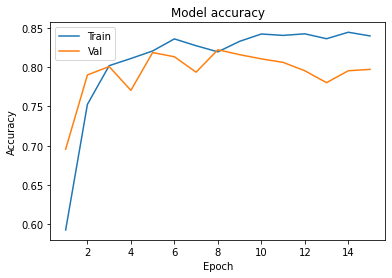

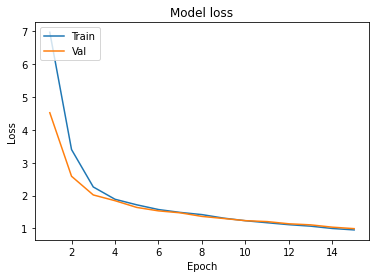

In [61]:
 plot_learningCurve (history, 15)

In [74]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# cn =  confusion_matrix(Y_test,classes_x)
# print(" The confusion_matrix ")
# sns.heatmap(cn, annot=True, square =True ,  cmap="Blues", fmt='d')